inizializzare il file importando il dataset

In [ ]:
from sklearn.neural_network import MLPClassifier
from torchvision.datasets import MNIST
from torchvision.transforms import Lambda
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

mnist_train = MNIST(root="../mnist",
                    train=True,
                    download=True)
mnist_test = MNIST(root="../mnist",
                    train=False,
                    download=True)

mnist_train_data, mnist_train_targets = mnist_train.data.numpy(), mnist_train.targets.numpy()
mnist_test_data, mnist_test_targets = mnist_test.data.numpy(), mnist_test.targets.numpy()

mnist_train_data = mnist_train_data.reshape(60000, 28*28)
mnist_test_data = mnist_test_data.reshape(10000, 28*28)

mnist_train_data = mnist_train_data / 255
mnist_test_data = mnist_test_data / 255

random_state = 0

100%|██████████| 9912422/9912422 [00:00<00:00, 93505680.51it/s]


Extracting ../mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 84063632.08it/s]


Extracting ../mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32107053.34it/s]


Extracting ../mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15463091.53it/s]

Extracting ../mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



```Quali sono le cifre più difficili da riconoscere per la rete neurale?```
di seguito calcolo diverse iterazioni del MLPClassifier con vari strati per vedere l'errore sui singoli dati

funzione di aiuto per mostrare i grafici

In [ ]:
def displayConfusionMatrix(mnist_test_targets,test_predictions):
    _ = metrics.ConfusionMatrixDisplay.from_predictions(mnist_test_targets,test_predictions)
    
    error=np.zeros(10)

    for x in range(0,10):
        for y in range(0,10):
            if (x!=y):
                error[x]+=int(_.text_[x,y].get_text())
    max=0
    xmax=0
    ymax=0
    for x in range(0,10):
        for y in range(0,10):
            if (x!=y and int(_.text_[x,y].get_text())>max):
                ymax=y
                xmax=x
                max=int(_.text_[x,y].get_text())
    print(error)
    print((xmax,ymax,max))
    plt.figure(2) 
    x_axis = [0,1,2,3,4,5,6,7,8,9]

    plt.grid(axis='y')
    plt.bar(x_axis, error)
    plt.title('error distribution')
    plt.xlabel('numero')
    plt.ylabel('errori')
    plt.show()

# MLP con 2 * 2 neuroni nei strati nascosti

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 980.    0. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
(2, 1, 1032)


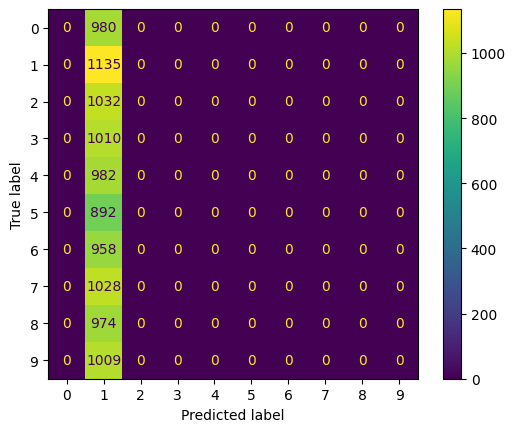

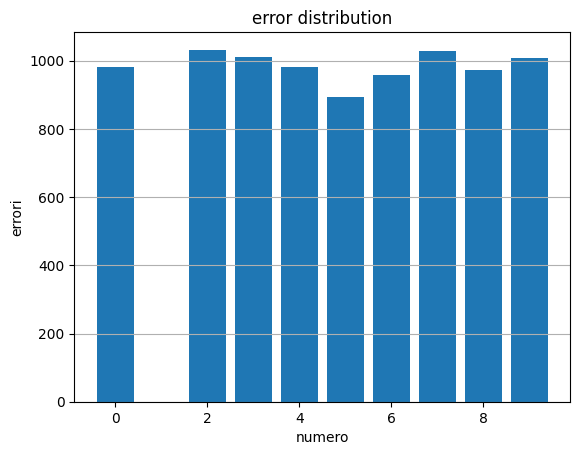

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(2,2),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_train_data, mnist_train_targets)

test_predictions = MLP.predict(mnist_test_data)

displayConfusionMatrix(mnist_test_targets,test_predictions)

# MLP con 3 * 3 neuroni nei strati nascosti

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 95.  25. 432. 222. 270. 318. 119. 230. 354. 322.]
(2, 1, 294)


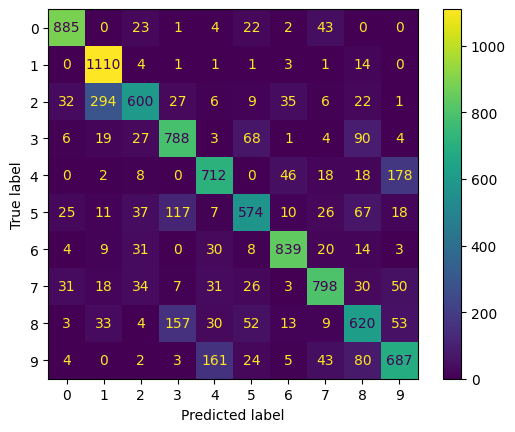

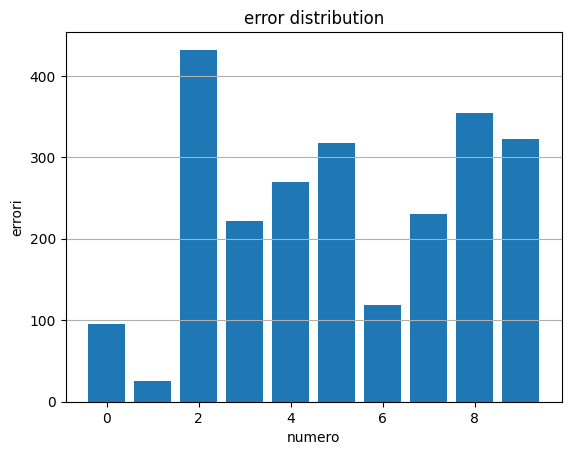

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(3, 3),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_train_data, mnist_train_targets)

test_predictions = MLP.predict(mnist_test_data)

displayConfusionMatrix(mnist_test_targets,test_predictions)

# MLP con 10 * 10 neuroni nei strati nascosti

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 23.  23.  95.  69.  46. 105.  50.  72. 102.  78.]
(5, 3, 39)


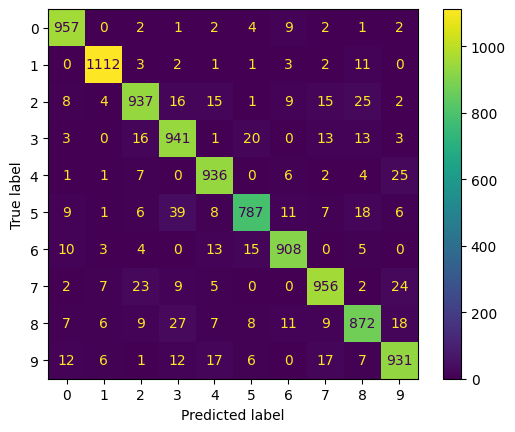

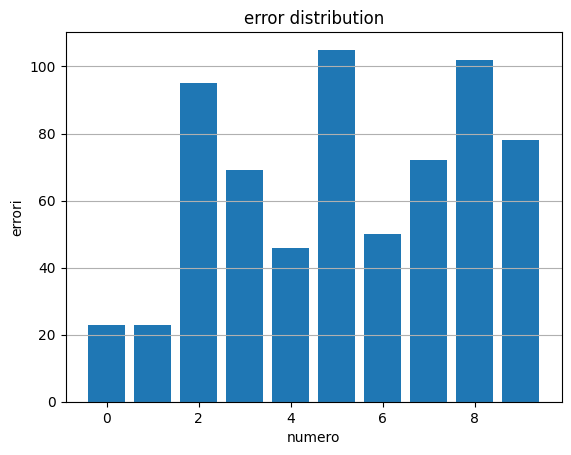

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(10, 10),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_train_data, mnist_train_targets)

test_predictions = MLP.predict(mnist_test_data)

displayConfusionMatrix(mnist_test_targets,test_predictions)

# MLP con 100 * 100 neuroni nei strati nascosti

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 9.  6. 26. 32. 19. 18. 21. 41. 26. 37.]
(7, 2, 13)


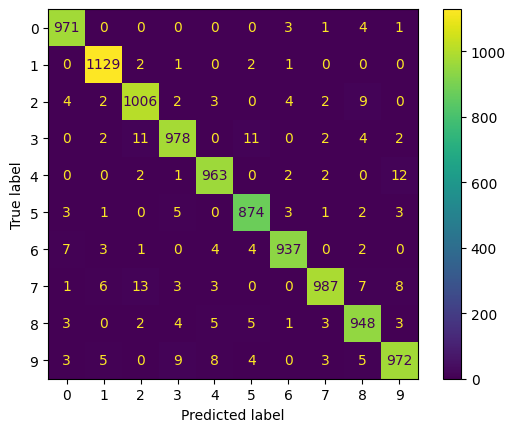

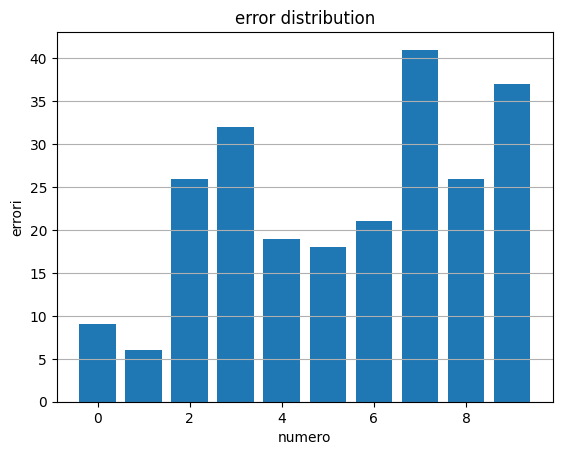

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 100),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_train_data, mnist_train_targets)

test_predictions = MLP.predict(mnist_test_data)

displayConfusionMatrix(mnist_test_targets,test_predictions)

# MLP con 100 * 100 * 100 neuroni nei strati nascosti

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[11. 19. 23. 12. 25. 36. 33. 35. 22. 31.]
(5, 3, 26)


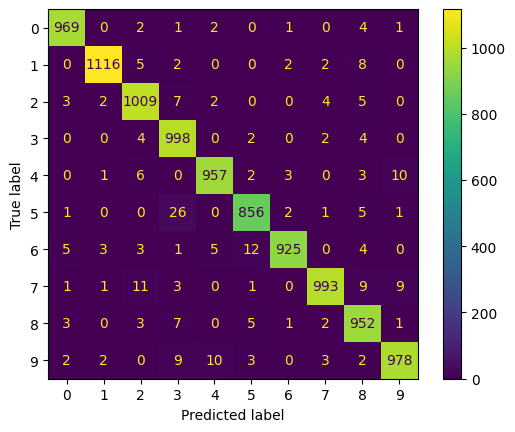

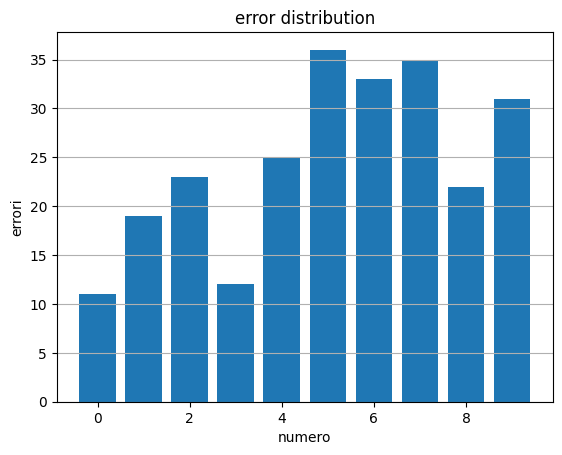

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 100,100),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_train_data, mnist_train_targets)

test_predictions = MLP.predict(mnist_test_data)

displayConfusionMatrix(mnist_test_targets,test_predictions)

# MLP con 500 * 500 neuroni nei strati nascosti

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 9.  2. 15. 22. 19. 14. 15. 14. 25. 54.]
(9, 7, 25)


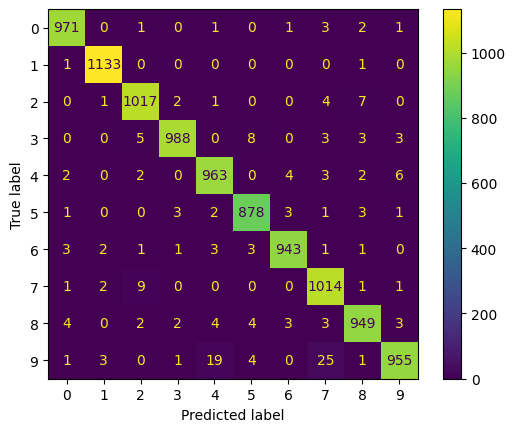

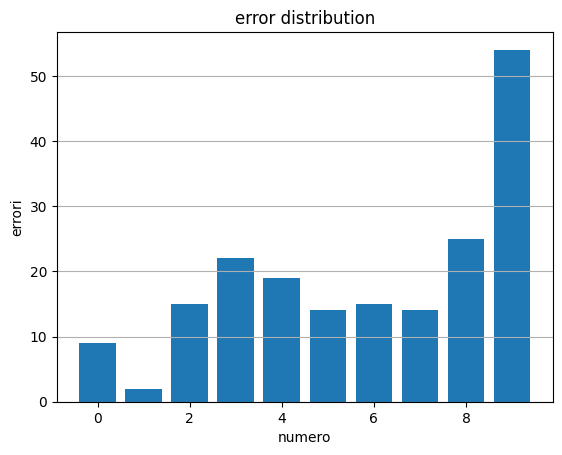

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_train_data, mnist_train_targets)

test_predictions = MLP.predict(mnist_test_data)

displayConfusionMatrix(mnist_test_targets,test_predictions)

da ora in poi si usera il MLP con 500 neuroni e 500 strati nascosti

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_train_data, mnist_train_targets)

test_predictions = MLP.predict(mnist_test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


```Visualizzare qualche esempio di pattern classificato in modo errato```

in questo caso visualizza le prime ```maxamt``` categorie classificate in modo errato

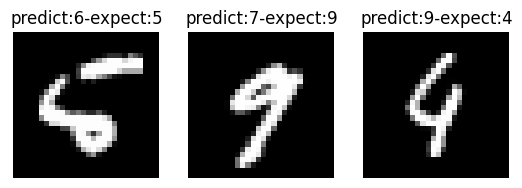

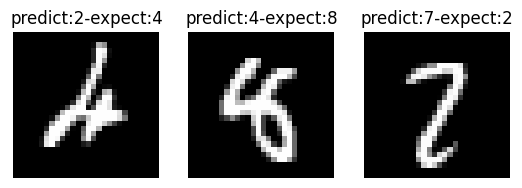

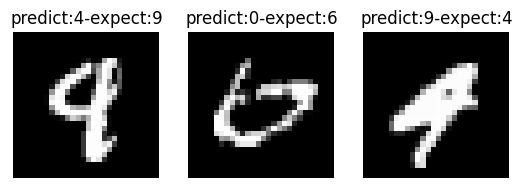

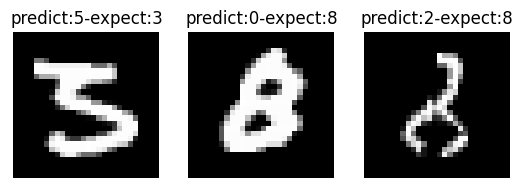

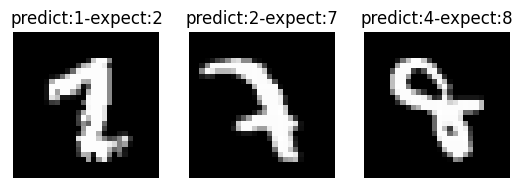

In [ ]:
maxamt=15



import numpy as np

fig, ax = plt.subplots(1, 3)
pos=0
current =0

for i in range(0,len(mnist_test_data)):
    
    if (test_predictions[i]!=mnist_test_targets[i]):
        ax[pos].axis('off')
        ax[pos].set_title("predict:"+str(test_predictions[i])+"-"+"expect:"+str(mnist_test_targets[i]))
        ax[pos].imshow(mnist_test_data[i].reshape(28, 28), cmap="gray")
        pos+=1
        #commentare per iterare su tutto il dataset
        current+=1
        if current>=maxamt:
            break
        if (pos==3):
            fig, ax = plt.subplots(1, 3)
            pos=0

```Per i pattern classificati correttamente, quanto rumore è necessario aggiungere per ottenere una classificazione errata?```

funzione per aggiungere rumore alle immagini

In [ ]:
def _inject_Gaussian_noise(mnist_data, noise_level):
  # creiamo una matrice di rumore della dimensione di un'immagine
  random_gaussian_tensor = np.random.normal(loc = 0, scale = noise_level, size = (1,784))   
  # aggiungiamo il rumore ai pixel originali, tagliando i valori minori di 0 o maggiori di 1
  noisy_images = mnist_data + random_gaussian_tensor
  noisy_images = np.clip(noisy_images,0,1)
  return noisy_images

```noisedivisor``` e usato per avere uno step costante tra 0 e 1 per calcolare il rumore
procede poi per ogni immagine di test a provare con un rumore tra 0 e 1 per vedere a quale quantita di rumore avviene l'errore
si puo dare il caso che anche aggiungendo rumore il MLP non dia errore questo caso non viene contato
infine si fa la media dividendo il numero totale per la le quantita calcolate

In [ ]:
total = 0
amtcalculated=0
noisedivisor = 10

for i in range(0,len(mnist_test_data)):
    if (test_predictions[i]==mnist_test_targets[i]):
        for noise in range(1,noisedivisor):
            noisy = _inject_Gaussian_noise(mnist_test_data[i],noise/noisedivisor)
            if (MLP.predict(noisy)!=mnist_test_targets[i]):
                total+=noise/noisedivisor
                amtcalculated+=1
                break
print("average noise needed:"+str(total/amtcalculated))

average noise needed:0.4950699458483846


# Visualizzare qualche esempio di pattern che viene classificato in modo errato a seguito dell’introduzione di rumore.

visualizza i primi ```n``` elementi in modo originale e dopo il rumore aggiunto per calcolare

0.4948196561938546


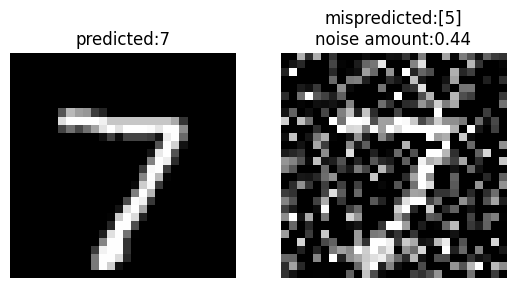

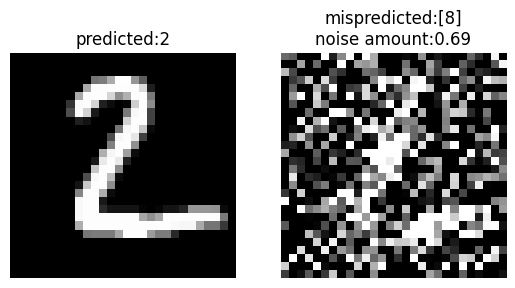

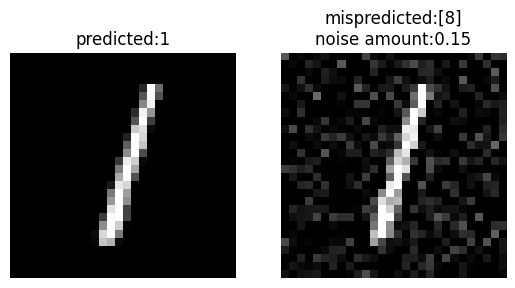

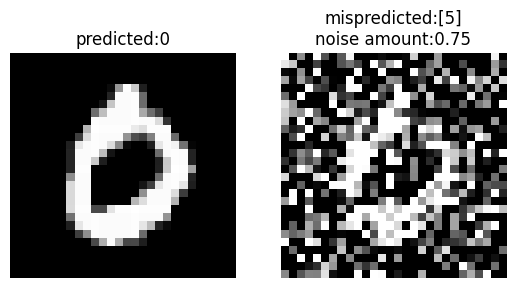

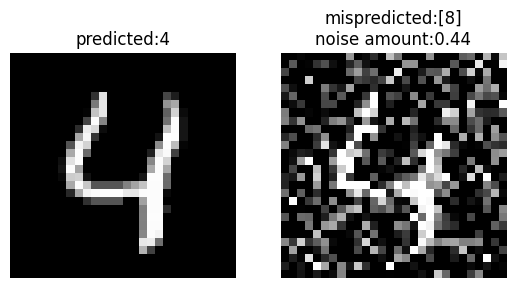

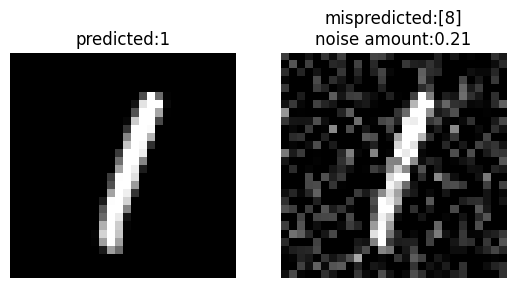

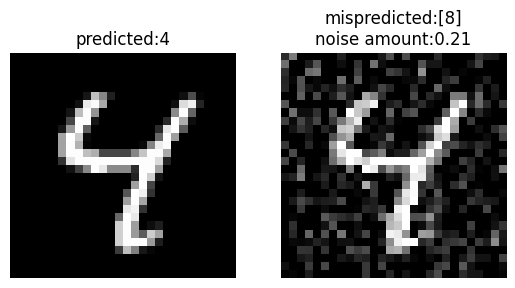

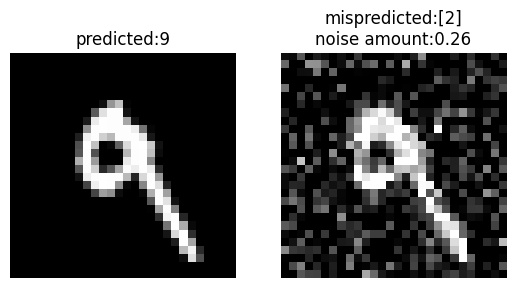

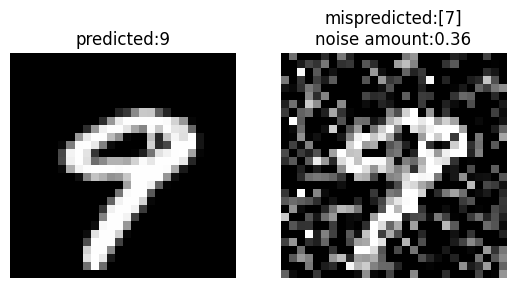

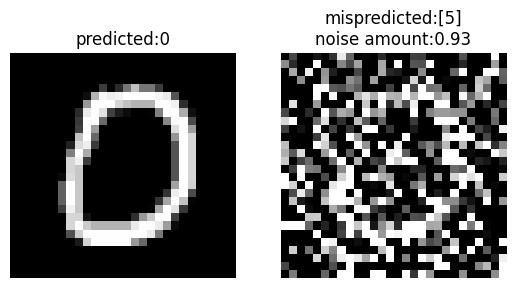

In [ ]:
n = 10

current =0
# for i in range(0,len(mnist_test_data)):
#     if (test_predictions[i]==mnist_test_targets[i]):
#         fig, ax = plt.subplots(1, 2)
#         ax[0].axis('off')
#         ax[0].set_title("predicted:"+str(mnist_test_targets[i]))
#         ax[0].imshow(mnist_test_data[i].reshape(28, 28), cmap="gray")
#         for noise in range(1,noisedivisor):
#             noisy = _inject_Gaussian_noise(mnist_test_data[i],noise/noisedivisor)
#             predict =MLP.predict(noisy)
#             if (predict!=mnist_test_targets[i]):
#                 total+=noise/noisedivisor
#                 amtcalculated+=1
#                 ax[1].axis('off')
#                 ax[1].set_title("mispredicted:"+str(predict)+"\n"+"noise amount:"+str(noise/noisedivisor))
#                 ax[1].imshow(noisy.reshape(28, 28), cmap="gray")
#                 current+=1
#                 break
    
#     if(current>=n):
#         break
for i in range(0,len(mnist_test_data)):
    if (test_predictions[i]==mnist_test_targets[i]):
        fig, ax = plt.subplots(1, 2)
        ax[0].axis('off')
        ax[0].set_title("predicted:"+str(mnist_test_targets[i]))
        ax[0].imshow(mnist_test_data[i].reshape(28, 28), cmap="gray")
        noiseamt=0.5
        lastpredict=mnist_test_targets[i]
        for noise in range(1,noisedivisor):
            noisy = _inject_Gaussian_noise(mnist_test_data[i],noiseamt)
            predict =MLP.predict(noisy)
            if (predict!=mnist_test_targets[i]):
                noiseamt-=1/2**(noise+1)
                lastpredict=predict
            else:
                noiseamt+=1/2**(noise+1)
        total+=noiseamt
        amtcalculated+=1
        ax[1].axis('off')
        ax[1].set_title("mispredicted:"+str(lastpredict)+"\n"+"noise amount:"+str(noiseamt)[0:4])
        ax[1].imshow(noisy.reshape(28, 28), cmap="gray")
        current+=1
    if(current>=n):
        break

print(total/amtcalculated)